In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

import cv2
import os

import numpy as np

In [3]:
labels = ['Non Oil Spill','Oil Spill']
img_size = 150
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [4]:
train = get_data(r"../input/oil-spill-dataset-binary-image-classification/final dataset used for oil spill/dataset-final/dataset/train")
val = get_data(r"../input/oil-spill-dataset-binary-image-classification/final dataset used for oil spill/dataset-final/dataset/Validation")
test=get_data(r"../input/oil-spill-dataset-binary-image-classification/final dataset used for oil spill/dataset-final/dataset/test")

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app


In [5]:
#training dataset-oil spill
import os
len(os.listdir("../input/oil-spill-dataset-binary-image-classification/final dataset used for oil spill/dataset-final/dataset/train/Oil Spill"))

1400

In [6]:
#training dataset-Non oil spill
import os
len(os.listdir("../input/oil-spill-dataset-binary-image-classification/final dataset used for oil spill/dataset-final/dataset/train/Non Oil Spill"))

1400

In [7]:
#testing dataset- oil spill
import os
len(os.listdir("../input/oil-spill-dataset-binary-image-classification/final dataset used for oil spill/dataset-final/dataset/test/Oil Spill"))

300

In [8]:
#testing dataset-Non oil spill
import os
len(os.listdir("../input/oil-spill-dataset-binary-image-classification/final dataset used for oil spill/dataset-final/dataset/test/Non Oil Spill"))

300

In [9]:
#validation dataset-oil spill
import os
len(os.listdir("../input/oil-spill-dataset-binary-image-classification/final dataset used for oil spill/dataset-final/dataset/Validation/Oil Spill"))

300

In [10]:
#validation dataset-Non oil spill
import os
len(os.listdir("../input/oil-spill-dataset-binary-image-classification/final dataset used for oil spill/dataset-final/dataset/Validation/Non Oil Spill"))

300

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

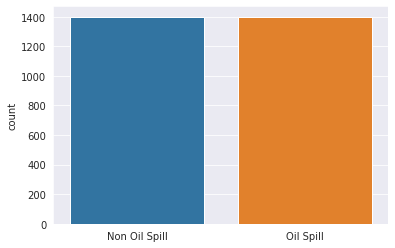

In [11]:
l = []
for i in train:
    if(i[1] == 0):
        l.append("Non Oil Spill")
    else:
        l.append("Oil Spill")
sns.set_style('darkgrid')
sns.countplot(l)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

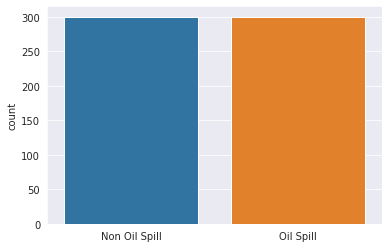

In [12]:
a = []
for i in val:
    if(i[1] == 0):
        a.append("Non Oil Spill")
    else:
        a.append("Oil Spill")
sns.set_style('darkgrid')
sns.countplot(a)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

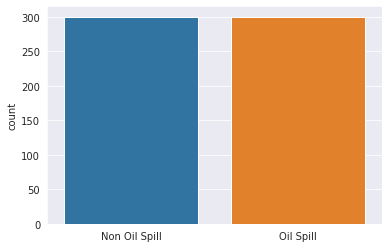

In [13]:
b = []
for i in test:
    if(i[1] == 0):
        b.append("Non Oil Spill")
    else:
        b.append("Oil Spill")
sns.set_style('darkgrid')
sns.countplot(b)

Text(0.5, 1.0, 'Non Oil Spill')

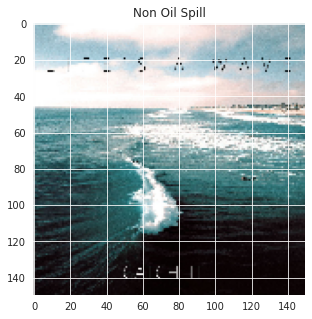

In [14]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title(labels[train[0][1]])

Text(0.5, 1.0, 'Oil Spill')

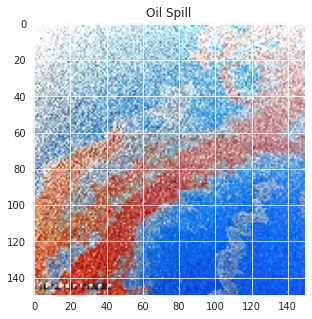

In [15]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title(labels[train[-1][1]])

In [16]:
#train

In [17]:
#test

In [18]:
#val

In [19]:
x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in val:
  x_val.append(feature)
  y_val.append(label)

for feature, label in test:
  x_test.append(feature)
  y_test.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255
x_test=np.array(x_test)/255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)



In [20]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)
print("x_val:",x_val.shape)
print("y_val:",y_val.shape)

x_train: (2800, 150, 150, 3)
y_train: (2800,)
x_test: (600, 150, 150, 3)
y_test: (600,)
x_val: (600, 150, 150, 3)
y_val: (600,)


In [21]:
x_train

array([[[[0.04705882, 0.62745098, 0.94117647],
         [0.14901961, 0.62352941, 0.94901961],
         [0.64705882, 0.78431373, 0.85882353],
         ...,
         [0.32941176, 0.77254902, 0.74901961],
         [0.02352941, 0.56078431, 0.8       ],
         [0.03921569, 0.43529412, 0.48627451]],

        [[0.05098039, 0.58431373, 0.94901961],
         [0.16078431, 0.65882353, 0.88235294],
         [0.61568627, 0.75686275, 0.74901961],
         ...,
         [0.05882353, 0.71764706, 0.85882353],
         [0.09411765, 0.62745098, 0.76470588],
         [0.68627451, 0.92156863, 0.84705882]],

        [[0.19607843, 0.68235294, 1.        ],
         [0.05882353, 0.58823529, 0.85098039],
         [0.41960784, 0.68627451, 0.71372549],
         ...,
         [0.02352941, 0.79215686, 0.83137255],
         [0.00392157, 0.45098039, 0.50588235],
         [0.04705882, 0.49803922, 0.4745098 ]],

        ...,

        [[0.34117647, 0.34509804, 0.32941176],
         [0.57647059, 0.56078431, 0.58039216]

In [22]:

datagen = ImageDataGenerator(
       featurewise_center=False,  
       samplewise_center=False,  
       featurewise_std_normalization=False,  
       samplewise_std_normalization=False,  
       zca_whitening=False,  
       rotation_range = 90, 
       zoom_range = 0.5, 
       width_shift_range=0.2,  
       height_shift_range=0.2,  
       horizontal_flip = True,  
       
)


datagen.fit(x_train)
datagen.fit(x_val)
datagen.fit(x_test)


In [23]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding="same", activation="relu", input_shape=(150,150,3)))
model.add(MaxPool2D((2, 2), strides=2))

model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
model.add(MaxPool2D((2, 2), strides=2))

model.add(Conv2D(64, (3,3), padding="same", activation="relu"))
model.add(MaxPool2D((2, 2), strides=2))

model.add(Conv2D(64,(3,3), padding="same", activation="relu"))
model.add(MaxPool2D((2, 2), strides=2))


model.add(Dropout(0.2))
model.add(Flatten())
#model.add(Dense(128,activation="relu"))
"""
model.add(Dense(84,activation="relu"))
model.add(Dense(32,activation="relu"))
"""
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 64)        3

In [24]:
opt = Adam(lr=0.001)
model.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [25]:
#tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)'sparse_categorical_crossentropy'validation_data = (x_val, y_val)

In [26]:
history = model.fit(x_train,y_train,epochs = 25,validation_data = (x_val, y_val),shuffle=True,batch_size=64)

Epoch 1/25
44/44 [==============================] - 26s 570ms/step - loss: 0.6345 - accuracy: 0.6332 - val_loss: 0.5953 - val_accuracy: 0.6783
Epoch 2/25
44/44 [==============================] - 24s 538ms/step - loss: 0.4645 - accuracy: 0.7904 - val_loss: 0.4499 - val_accuracy: 0.7567
Epoch 3/25
44/44 [==============================] - 25s 570ms/step - loss: 0.3428 - accuracy: 0.8475 - val_loss: 0.4913 - val_accuracy: 0.7950
Epoch 4/25
44/44 [==============================] - 25s 569ms/step - loss: 0.2493 - accuracy: 0.8968 - val_loss: 0.3653 - val_accuracy: 0.8467
Epoch 5/25
44/44 [==============================] - 25s 562ms/step - loss: 0.2004 - accuracy: 0.9218 - val_loss: 0.3799 - val_accuracy: 0.8300
Epoch 6/25
44/44 [==============================] - 23s 533ms/step - loss: 0.1601 - accuracy: 0.9429 - val_loss: 0.2031 - val_accuracy: 0.9017
Epoch 7/25
44/44 [==============================] - 24s 552ms/step - loss: 0.1018 - accuracy: 0.9636 - val_loss: 0.2354 - val_accuracy: 0.8967

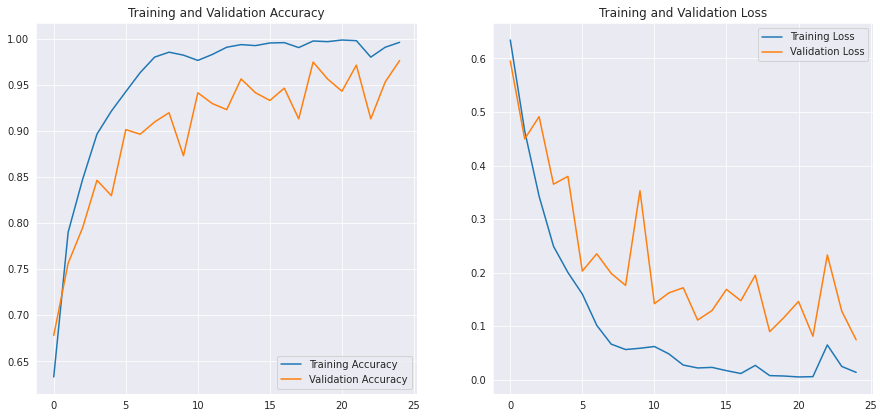

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Text(0, 0.5, 'Loss')

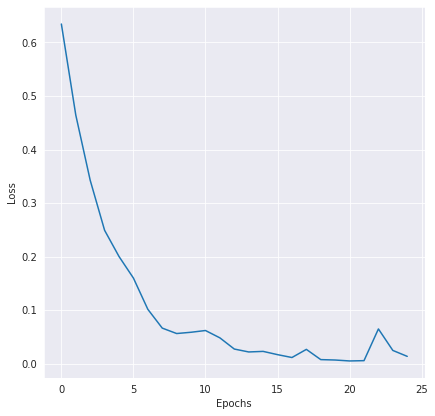

In [28]:
loss = history.history['loss']
epochs_range = range(25)
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, loss, label='loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

In [29]:
"""
predictions = model.predict_classes(x_test)
predictions = predictions.reshape(1,-1)[0]

print(classification_report(y_val, predictions, target_names = ['Rugby (Class 0)','Soccer (Class 1)']))
"""

"\npredictions = model.predict_classes(x_test)\npredictions = predictions.reshape(1,-1)[0]\n\nprint(classification_report(y_val, predictions, target_names = ['Rugby (Class 0)','Soccer (Class 1)']))\n"

In [30]:
predictions = model.predict(x_test)
pred=np.argmax(predictions,axis=1)
pred = pred.reshape(1,-1)[0]
print(classification_report(y_test,pred, target_names = ['Non Oil Spill(Class 0)','Oil Spill (Class 1)']))

                        precision    recall  f1-score   support

Non Oil Spill(Class 0)       0.97      0.99      0.98       300
   Oil Spill (Class 1)       0.99      0.97      0.98       300

              accuracy                           0.98       600
             macro avg       0.98      0.98      0.98       600
          weighted avg       0.98      0.98      0.98       600



In [31]:
model.evaluate(x_test,y_test,batch_size=64)

10/10 [==============================] - 1s 120ms/step - loss: 0.0614 - accuracy: 0.9800


[0.061446622014045715, 0.9800000190734863]

In [32]:
pred.shape

(600,)

In [33]:
y_test.shape

(600,)